# Criação do Dataset Balanceado

## CICDDoS2019

### Dia de coleta 01/12

In [2]:
from py.DatasetHandler import DatasetHandler

handler = DatasetHandler(logging=True)

handler.create_balanced_dataset(
    src_dir="datasets/CICDDoS2019/Origin/01-12", 
    dest_dir="datasets/CICDDoS2019/data/01-12/Classification", 
    output_filename="BALANCED.CSV", 
    n_samples_per_class=10000,
    chunk_size=100000,
    target_files=None,
    ignored_classes=['WebDDoS'],
    allow_insufficient=True
)

PROCESSAMENTO OTIMIZADO (CHUNKS): BALANCED.CSV
Arquivos Selecionados: 11
Tamanho do Lote (Chunksize): 100000
Classes Ignoradas: ['WebDDoS']

[*] Varredura global (Lendo em lotes)...
[*] Validando quantidades disponíveis...

[*] Coletando e Salvando em disco (Lotes de 100000)...
   -> Processando: DrDoS_DNS.csv
   -> Processando: DrDoS_LDAP.csv
   -> Processando: DrDoS_MSSQL.csv
   -> Processando: DrDoS_NetBIOS.csv
   -> Processando: DrDoS_NTP.csv
   -> Processando: DrDoS_SNMP.csv
   -> Processando: DrDoS_SSDP.csv
   -> Processando: DrDoS_UDP.csv
   -> Processando: Syn.csv
      [IO] Buffer cheio (100000 linhas). Salvando lote no disco...
   -> Processando: TFTP.csv
   -> Processando: UDPLag.csv
      [IO] Salvando lote final (20000 linhas)...

CONCLUÍDO COM SUCESSO
Arquivo gerado: datasets/CICDDoS2019/data/01-12/Classification\BALANCED.CSV


### Dia de coleta 03/11

In [1]:
from py.DatasetHandler import DatasetHandler

handler = DatasetHandler(logging=True)

handler.create_balanced_dataset(
    src_dir="datasets/CICDDoS2019/Origin/03-11", 
    dest_dir="datasets/CICDDoS2019/data/03-11", 
    output_filename="BALANCED.CSV", 
    n_samples_per_class=10000,
    chunk_size=100000,
    target_files=None,
    ignored_classes=None,
    allow_insufficient=True
)

PROCESSAMENTO OTIMIZADO (CHUNKS): BALANCED.CSV
Arquivos Selecionados: 7
Tamanho do Lote (Chunksize): 100000

[*] Varredura global (Lendo em lotes)...
[*] Validando quantidades disponíveis...
 [AVISO] Permitindo 1 classes insuficientes: ['UDPLag']

[*] Coletando e Salvando em disco (Lotes de 100000)...
   -> Processando: LDAP.csv
   -> Processando: MSSQL.csv
   -> Processando: NetBIOS.csv
   -> Processando: Portmap.csv
   -> Processando: Syn.csv
   -> Processando: UDP.csv
   -> Processando: UDPLag.csv
      [IO] Salvando lote final (71873 linhas)...

CONCLUÍDO COM SUCESSO
Arquivo gerado: datasets/CICDDoS2019/data/03-11\BALANCED.CSV


## CIC-IDS-2017

In [2]:
from py.DatasetHandler import DatasetHandler

handler = DatasetHandler(logging=True)

handler.create_balanced_dataset(
    src_dir="datasets/CIC-IDS-2017/Origin", 
    dest_dir="datasets/CIC-IDS-2017/data", 
    output_filename="BALANCED.CSV", 
    n_samples_per_class=5000,
    chunk_size=100000,
    target_files=['Friday-WorkingHours-Afternoon-DDos.csv', 'Wednesday-workingHours.csv'],
    ignored_classes=['Heartbleed'],
    allow_insufficient=False
)

PROCESSAMENTO OTIMIZADO (CHUNKS): BALANCED.CSV
Arquivos Selecionados: 2
Tamanho do Lote (Chunksize): 100000
Classes Ignoradas: ['Heartbleed']

[*] Varredura global (Lendo em lotes)...
[*] Validando quantidades disponíveis...

[*] Coletando e Salvando em disco (Lotes de 100000)...
   -> Processando: Friday-WorkingHours-Afternoon-DDos.csv
   -> Processando: Wednesday-workingHours.csv
      [IO] Salvando lote final (30000 linhas)...

CONCLUÍDO COM SUCESSO
Arquivo gerado: datasets/CIC-IDS-2017/data\BALANCED.CSV


# Análise de Similaridade

## CICDDoS2019

### Dia de coleta 01/12

Limpeza: Removendo espaços, identificadores (Flow ID, Timestamp, Unnamed: 0) e colunas vazias...
Pré-processamento: Convertendo infinitos...
Tratamento de Nulos: Preenchendo com ZERO.
Normalização: MinMaxScaler
Target: Processando coluna 'Label' como Multiclasse...
Seleção de Features: Nenhuma técnica selecionada. Mantendo todas as colunas.
Finalização: Retornando DataFrame pandas processado.


 INICIANDO EXTRAÇÃO DE FEATURES OVR (ONE-VS-REST)
 [*] Analisando Assinatura Local: BENIGN vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_DNS vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_LDAP vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_MSSQL vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_NTP vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_NetBIOS vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_SNMP vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_SSDP vs Resto do Tráfego...
 [*] Anali

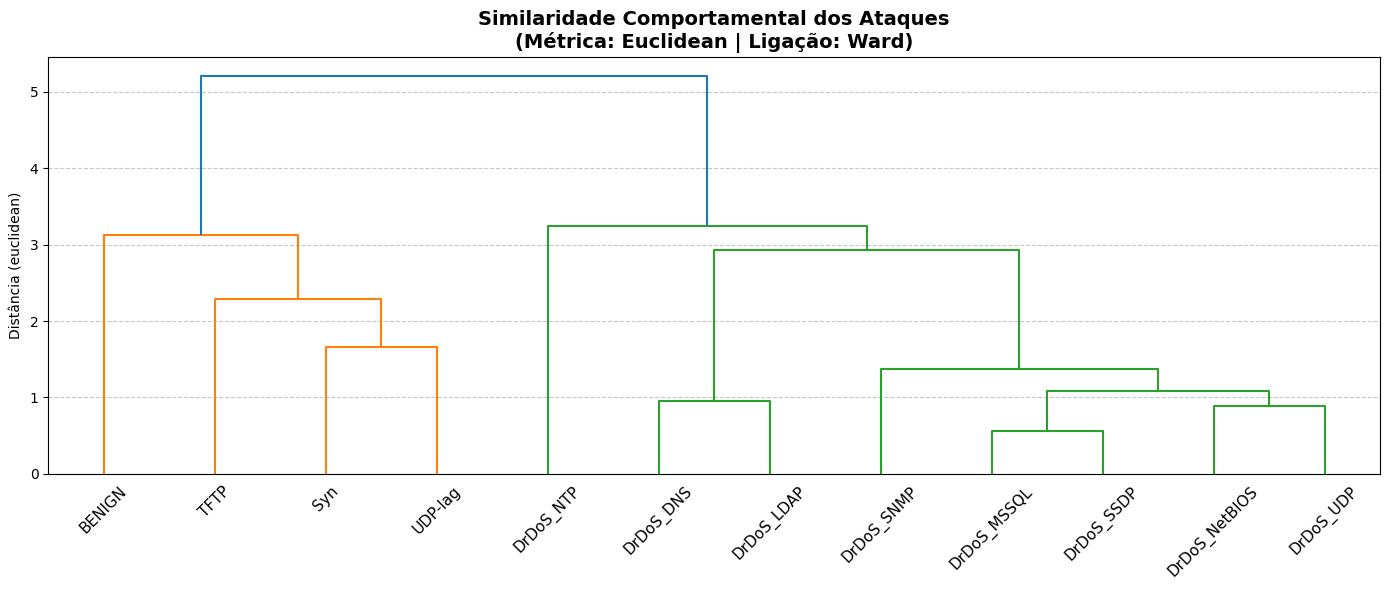


 [*] Gerando Mapa de Calor de Features (Ordenado)...


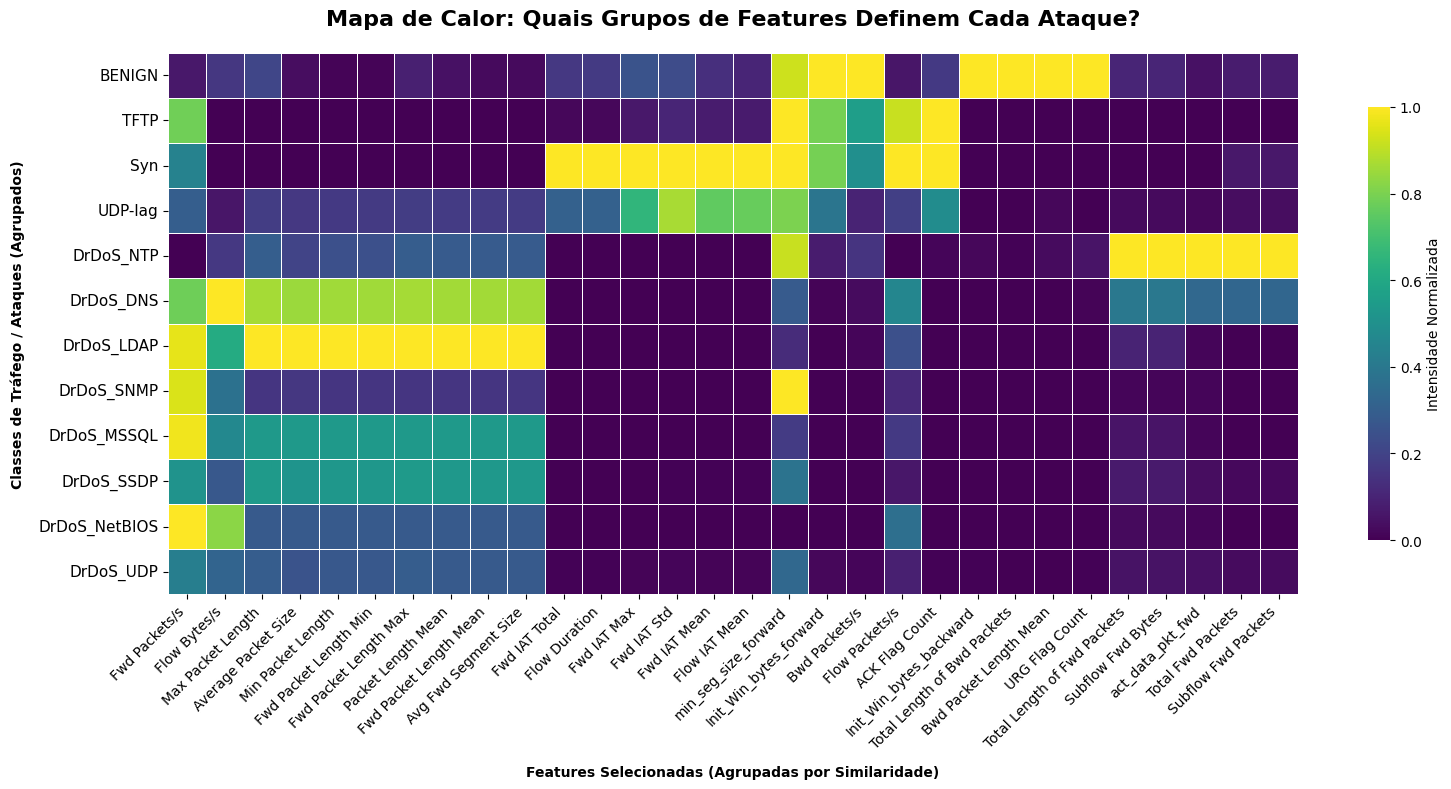

In [12]:
import pandas as pd
from py.DataStreamProcessor import DataStreamProcessor
from py.DatasetHandler import DatasetHandler

# Instancia as duas ferramentas
processor = DataStreamProcessor(logging=True)
handler = DatasetHandler(logging=True)

# Carrega o CSV 
df_bruto = pd.read_csv('datasets/CICDDoS2019/data/01-12/BALANCED.CSV')

# Pré-Processamento 
X_df, y_array, target_names = processor.create_stream(
    df=df_bruto,
    target_label_col='Label',
    binary_label=False,               # Falso pois queremos ver CADA ataque separado
    normalize_method='MinMaxScaler',  # Normaliza entre 0 e 1
    imputation_method='0',            # Substitui NaNs por 0
    extra_ignore_cols=['Source IP', 'Source Port','Destination IP','Destination Port','Protocol', 'Inbound'],
    return_stream=False               # Retorna (DataFrame de Features, Array de Labels, Nomes)
)

# Executa a Seleção OvR (One-vs-Rest)
dict_features, vetor_features_finais = handler.extract_ovr_feature_importance(
    X=X_df, 
    y=y_array, 
    target_names=target_names,
    top_per_class=7 
)

# Plota os Dendrogramas e Mapas de Calor
handler.plot_similarity_and_feature_groups(
    X=X_df, 
    y=y_array, 
    target_names=target_names,
    selected_features=vetor_features_finais, 
    metric='euclidian',   # cosine / euclidian
    linkage_method='ward' # average / ward 
)

### Dia de coleta 03/11

Limpeza: Removendo espaços, identificadores (Flow ID, Timestamp, Unnamed: 0) e colunas vazias...
Pré-processamento: Convertendo infinitos...
Tratamento de Nulos: Preenchendo com ZERO.
Normalização: MinMaxScaler
Target: Processando coluna 'Label' como Multiclasse...
Seleção de Features: Nenhuma técnica selecionada. Mantendo todas as colunas.
Finalização: Retornando DataFrame pandas processado.


 INICIANDO EXTRAÇÃO DE FEATURES OVR (ONE-VS-REST)
 [*] Analisando Assinatura Local: BENIGN vs Resto do Tráfego...
 [*] Analisando Assinatura Local: LDAP vs Resto do Tráfego...
 [*] Analisando Assinatura Local: MSSQL vs Resto do Tráfego...
 [*] Analisando Assinatura Local: NetBIOS vs Resto do Tráfego...
 [*] Analisando Assinatura Local: Portmap vs Resto do Tráfego...
 [*] Analisando Assinatura Local: Syn vs Resto do Tráfego...
 [*] Analisando Assinatura Local: UDP vs Resto do Tráfego...
 [*] Analisando Assinatura Local: UDPLag vs Resto do Tráfego...

----------------------------------------------

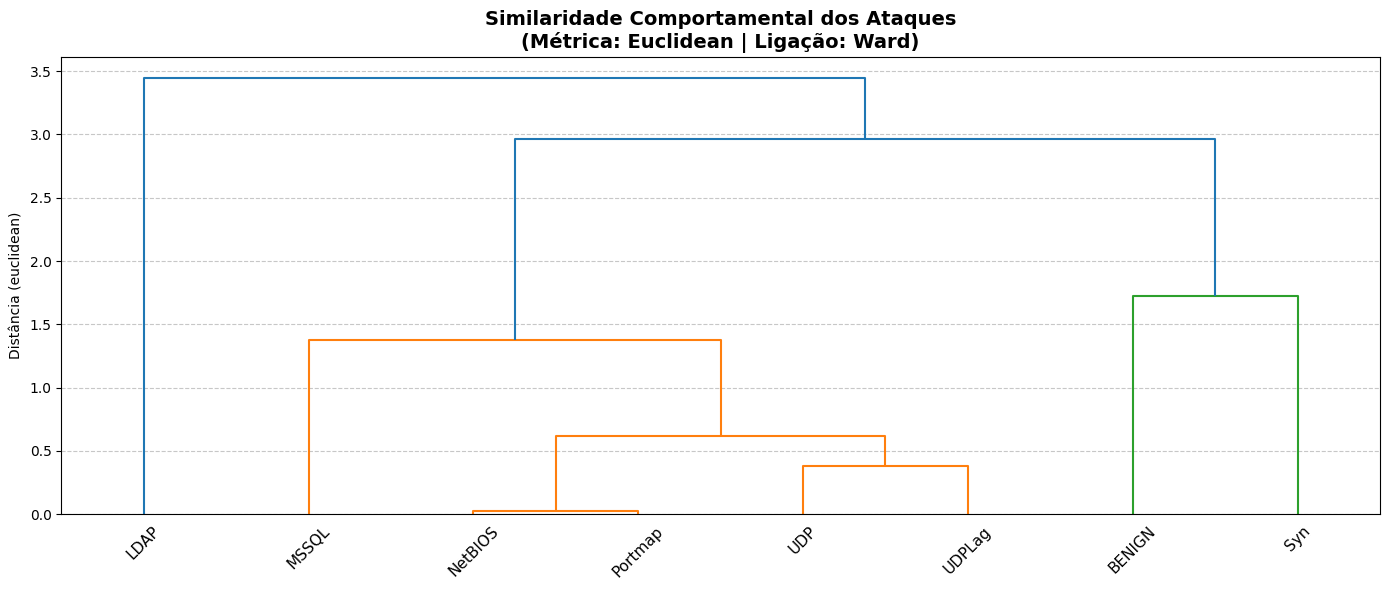


 [*] Gerando Mapa de Calor de Features (Ordenado)...


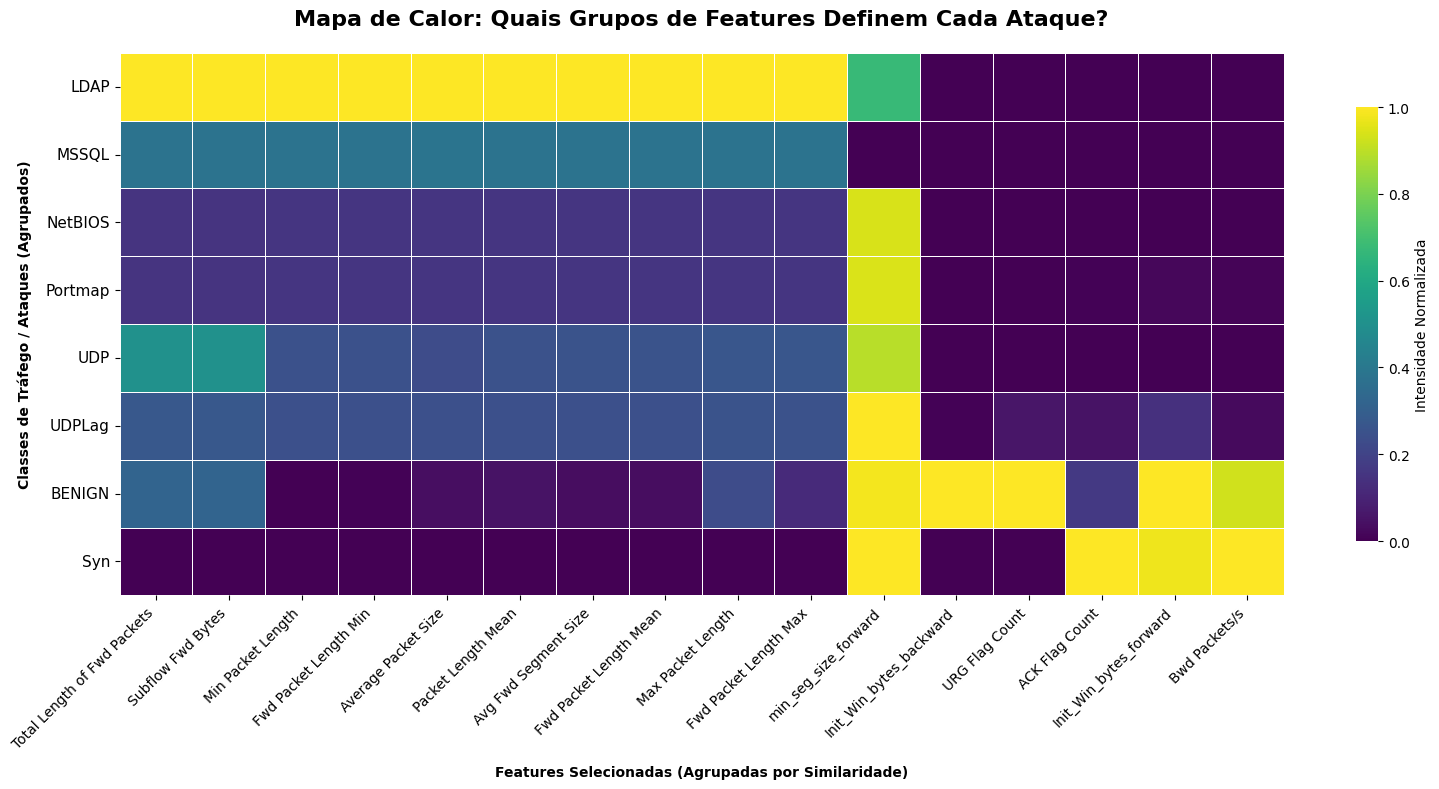

In [13]:
import pandas as pd
from py.DataStreamProcessor import DataStreamProcessor
from py.DatasetHandler import DatasetHandler

# Instancia as duas ferramentas
processor = DataStreamProcessor(logging=True)
handler = DatasetHandler(logging=True)

# Carrega o CSV 
df_bruto = pd.read_csv('datasets/CICDDoS2019/data/03-11/BALANCED.CSV')

# Pré-Processamento 
X_df, y_array, target_names = processor.create_stream(
    df=df_bruto,
    target_label_col='Label',
    binary_label=False,               # Falso pois queremos ver CADA ataque separado
    normalize_method='MinMaxScaler',  # Normaliza entre 0 e 1
    imputation_method='0',            # Substitui NaNs por 0
    extra_ignore_cols=['Source IP', 'Source Port','Destination IP','Destination Port','Protocol', 'Inbound'],
    return_stream=False               # Retorna (DataFrame de Features, Array de Labels, Nomes)
)

# Executa a Seleção OvR (One-vs-Rest)
dict_features, vetor_features_finais = handler.extract_ovr_feature_importance(
    X=X_df, 
    y=y_array, 
    target_names=target_names,
    top_per_class=7 
)

# Plota os Dendrogramas e Mapas de Calor
handler.plot_similarity_and_feature_groups(
    X=X_df, 
    y=y_array, 
    target_names=target_names,
    selected_features=vetor_features_finais, 
    metric='euclidian',   # cosine / euclidian
    linkage_method='ward' # average / ward 
)

## CIC-IDS-2017

Limpeza: Removendo espaços, identificadores (Flow ID, Timestamp, Unnamed: 0) e colunas vazias...
Pré-processamento: Convertendo infinitos...
Tratamento de Nulos: Preenchendo com ZERO.
Normalização: MinMaxScaler
Target: Processando coluna 'Label' como Multiclasse...
Seleção de Features: Nenhuma técnica selecionada. Mantendo todas as colunas.
Finalização: Retornando DataFrame pandas processado.


 INICIANDO EXTRAÇÃO DE FEATURES OVR (ONE-VS-REST)
 [*] Analisando Assinatura Local: BENIGN vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DDoS vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DoS GoldenEye vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DoS Hulk vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DoS Slowhttptest vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DoS slowloris vs Resto do Tráfego...

--------------------------------------------------
 [RESUMO] Total de classes analisadas: 6
 [RESUMO] Features únicas consolidadas: 32 (de 77 o

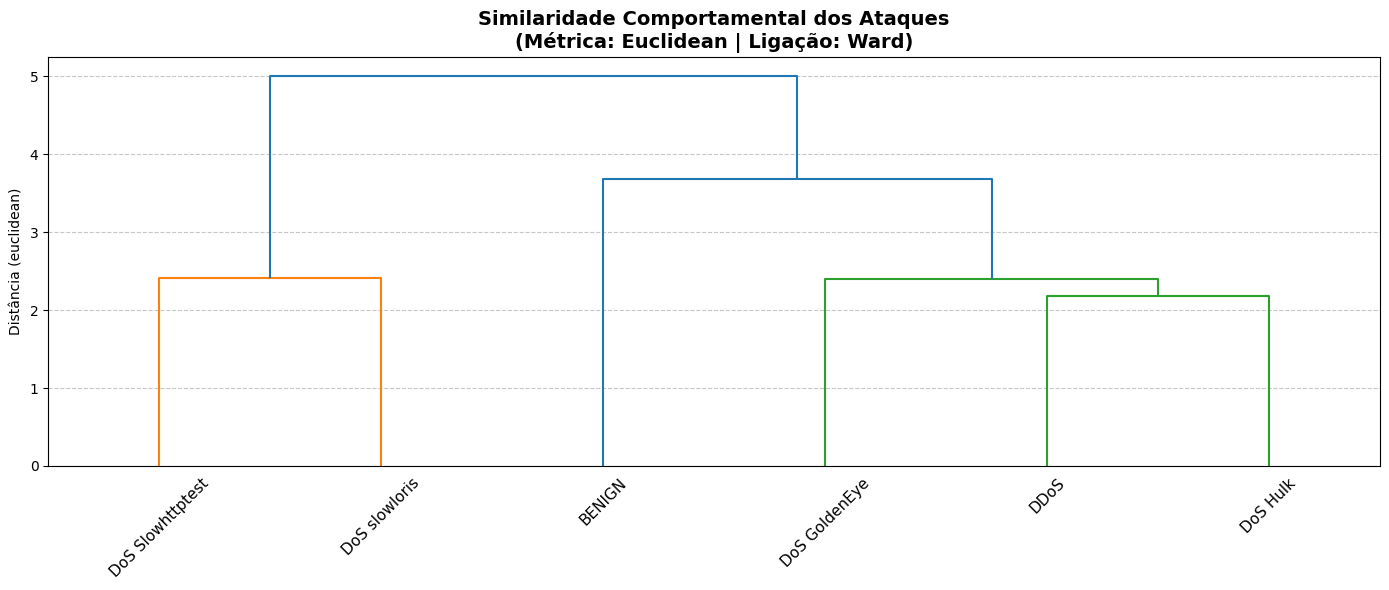


 [*] Gerando Mapa de Calor de Features (Ordenado)...


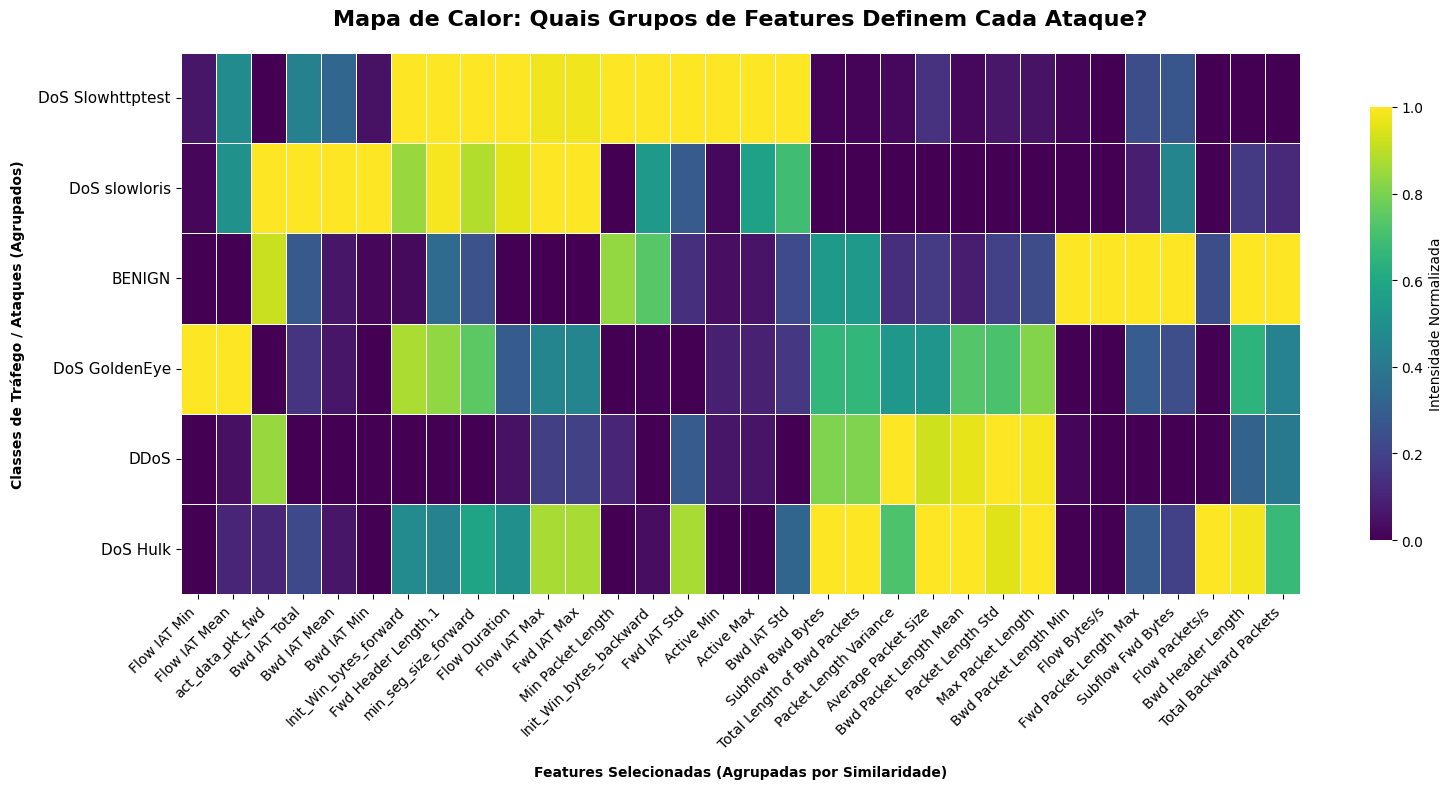

In [14]:
import pandas as pd
from py.DataStreamProcessor import DataStreamProcessor
from py.DatasetHandler import DatasetHandler

# Instancia as duas ferramentas
processor = DataStreamProcessor(logging=True)
handler = DatasetHandler(logging=True)

# Carrega o CSV 
df_bruto = pd.read_csv('datasets/CIC-IDS-2017/data/BALANCED.CSV')

# Pré-Processamento 
X_df, y_array, target_names = processor.create_stream(
    df=df_bruto,
    target_label_col='Label',
    binary_label=False,               # Falso pois queremos ver CADA ataque separado
    normalize_method='MinMaxScaler',  # Normaliza entre 0 e 1
    imputation_method='0',            # Substitui NaNs por 0
    extra_ignore_cols=['Source IP', 'Source Port','Destination IP','Destination Port','Protocol', 'Inbound'],
    return_stream=False               # Retorna (DataFrame de Features, Array de Labels, Nomes)
)

# Executa a Seleção OvR (One-vs-Rest)
dict_features, vetor_features_finais = handler.extract_ovr_feature_importance(
    X=X_df, 
    y=y_array, 
    target_names=target_names,
    top_per_class=7 
)

# Plota os Dendrogramas e Mapas de Calor
handler.plot_similarity_and_feature_groups(
    X=X_df, 
    y=y_array, 
    target_names=target_names,
    selected_features=vetor_features_finais, 
    metric='euclidian',   # cosine / euclidian
    linkage_method='ward' # average / ward 
)

# Criando gráfico de radar

## CICDDoS2019

### Coleta dia de coleta 01/12

Limpeza: Removendo espaços, identificadores (Flow ID, Timestamp, Unnamed: 0) e colunas vazias...
Pré-processamento: Convertendo infinitos...
Tratamento de Nulos: Preenchendo com a MEDIANA das colunas...
Normalização: MinMaxScaler
Target: Processando coluna 'Label' como Multiclasse...
Seleção de Features: Iniciando pipeline de redução de dimensionalidade...

--- Iniciando Processo de Seleção de Features (Total: 78) ---
Remoção de Variância: Pular.
Correlação (>0.8): 34 features redundantes removidas. Restantes: 44
Random Forest: Top 15 selecionadas.
Features Finais (15) - ['Fwd Packet Length Max', 'Total Length of Fwd Packets', 'Flow Bytes/s', 'Flow Duration', 'Flow Packets/s', 'Total Fwd Packets', 'Fwd Packets/s', 'Init_Win_bytes_forward', 'ACK Flag Count', 'Flow IAT Min', 'Inbound', 'min_seg_size_forward', 'Bwd Packets/s', 'Packet Length Variance', 'Fwd Packet Length Std']
--- Fim do Processo de Seleção de Features ---

Finalização: Retornando DataFrame pandas processado.



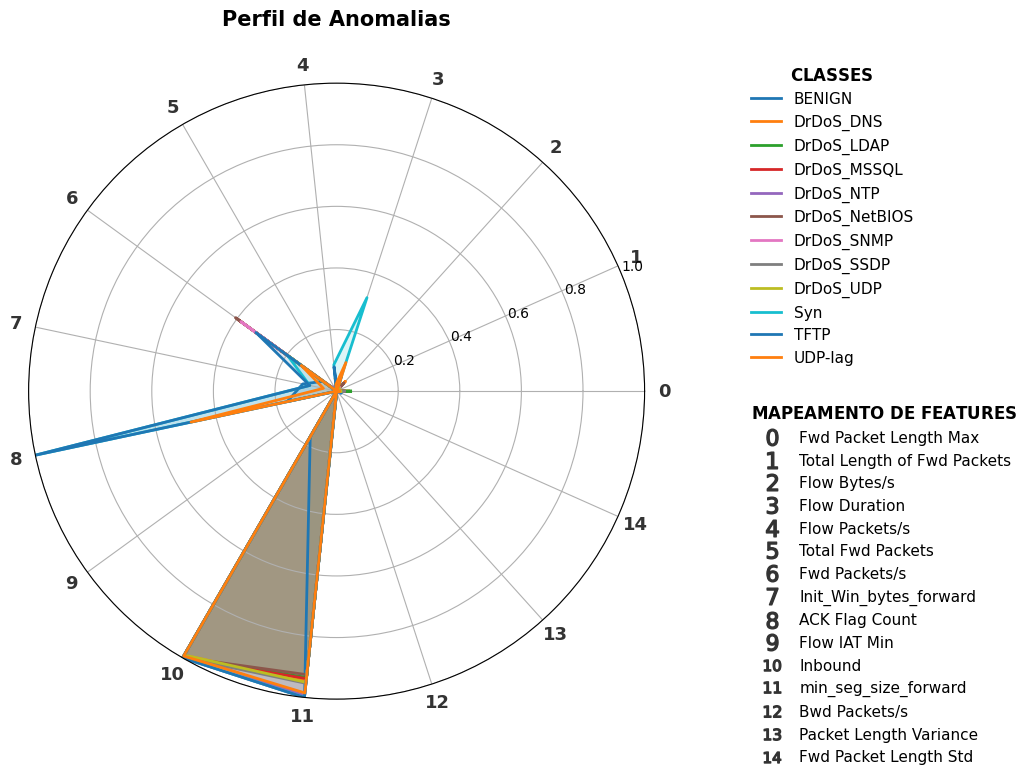

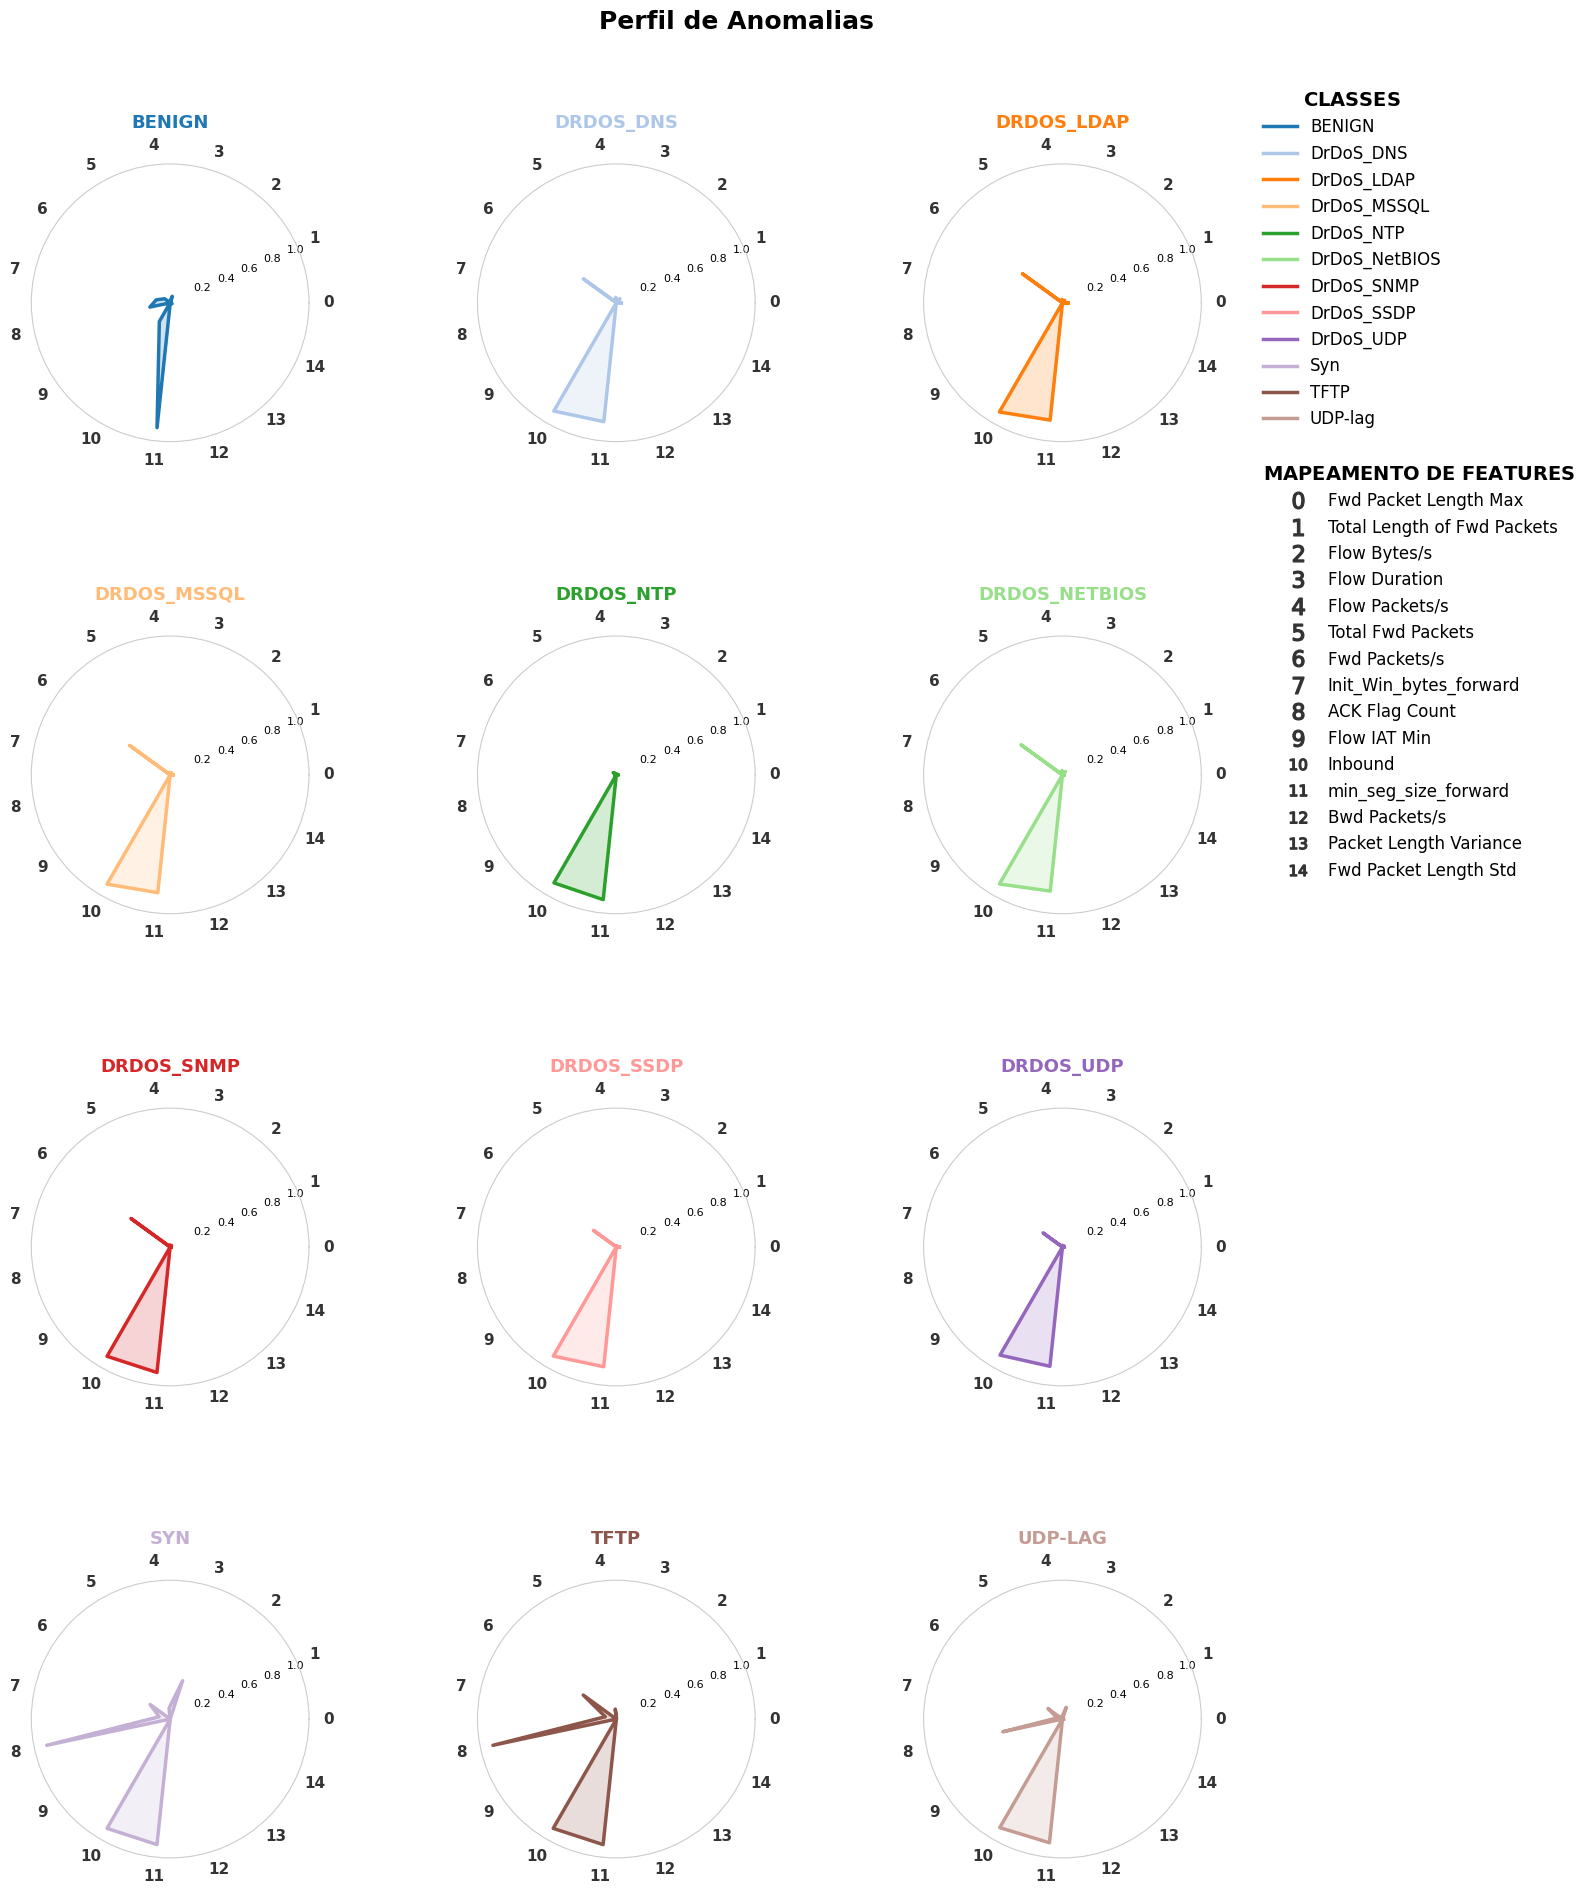

In [16]:
from py.DataStreamProcessor import DataStreamProcessor
from py.DatasetHandler import DatasetHandler
import pandas as pd

handler = DatasetHandler(logging=True)
processor = DataStreamProcessor(logging=True)

df = pd.read_csv('datasets/CICDDoS2019/data/01-12/BALANCED.CSV')

stream, targets, features = processor.create_stream(
    df=df, 
    target_label_col='Label', 
    binary_label=False, 
    normalize_method="MinMaxScaler", 
    threshold_var=None,
    threshold_corr=0.80,
    top_n_features=15,
    return_stream=False,
    extra_ignore_cols=['Source IP', 'Source Port','Destination IP','Destination Port','Protocol'],
    imputation_method='mediana'
)

handler.plot_feature_radar(stream, targets, features)
handler.plot_mini_radars(stream, targets, features)

### Coleta dia de coleta 01/12

## CIC-IDS-2017

# Criação de cenários

## CICDDoS2019

### Classificação

#### Cenário de Consistência

![DNS_DNS](datasets/CICDDoS2019/img/DNS_DNS.png)

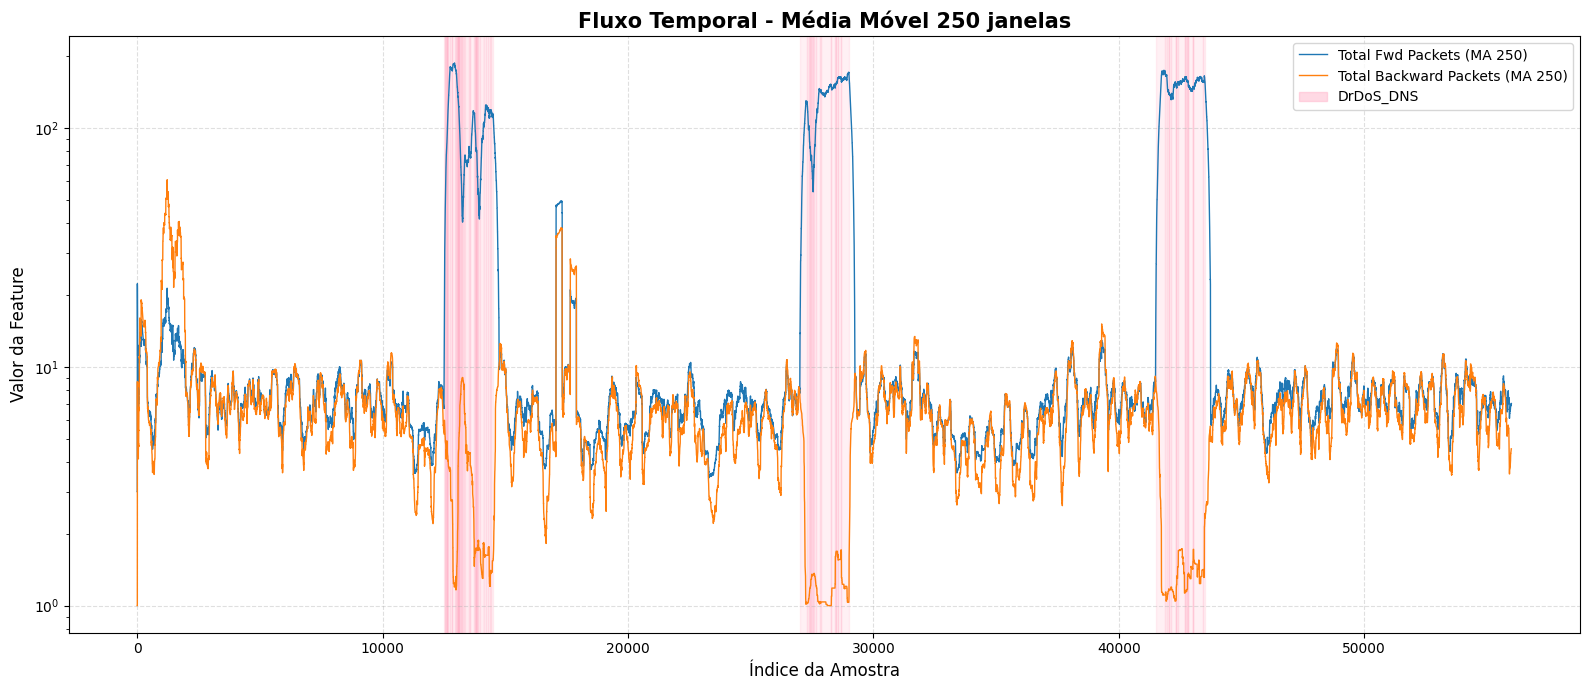

In [17]:
from py.ScenarioGenerator import ScenarioGenerator

meu_cenario = [
    ("DrDoS_DNS.csv", 2000),
    ("DrDoS_DNS.csv", 2000),
    ("DrDoS_DNS.csv", 2000)
]

gerador = ScenarioGenerator(
    input_folder="datasets/CICDDoS2019/Origin/01-12",
    output_path="datasets/CICDDoS2019/data/01-12/Classification/DNS_DNS_DNS.csv",
    baseline_file="datasets/CICDDoS2019/data/01-12/BENIGN.csv",
    logging=False,
    n_benign_samples=50000,
    sort_by_timestamp=False,
    remove_duplicates=False
)

gerador.generate(meu_cenario)
gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

#### Cenário Generalização 1

![DNS_LDAP](datasets/CICDDoS2019/img/DNS_LDAP.png)


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 50000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 50000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 1500 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 2000 amostras de DrDoS_LDAP.csv (Sem filtro).
    -> Bloco montado: 1500 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 50000 BENIGN em 4 fatias de aprox. 12500 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        50507
DrDoS_DNS      2493
DrDoS_LDAP     2000


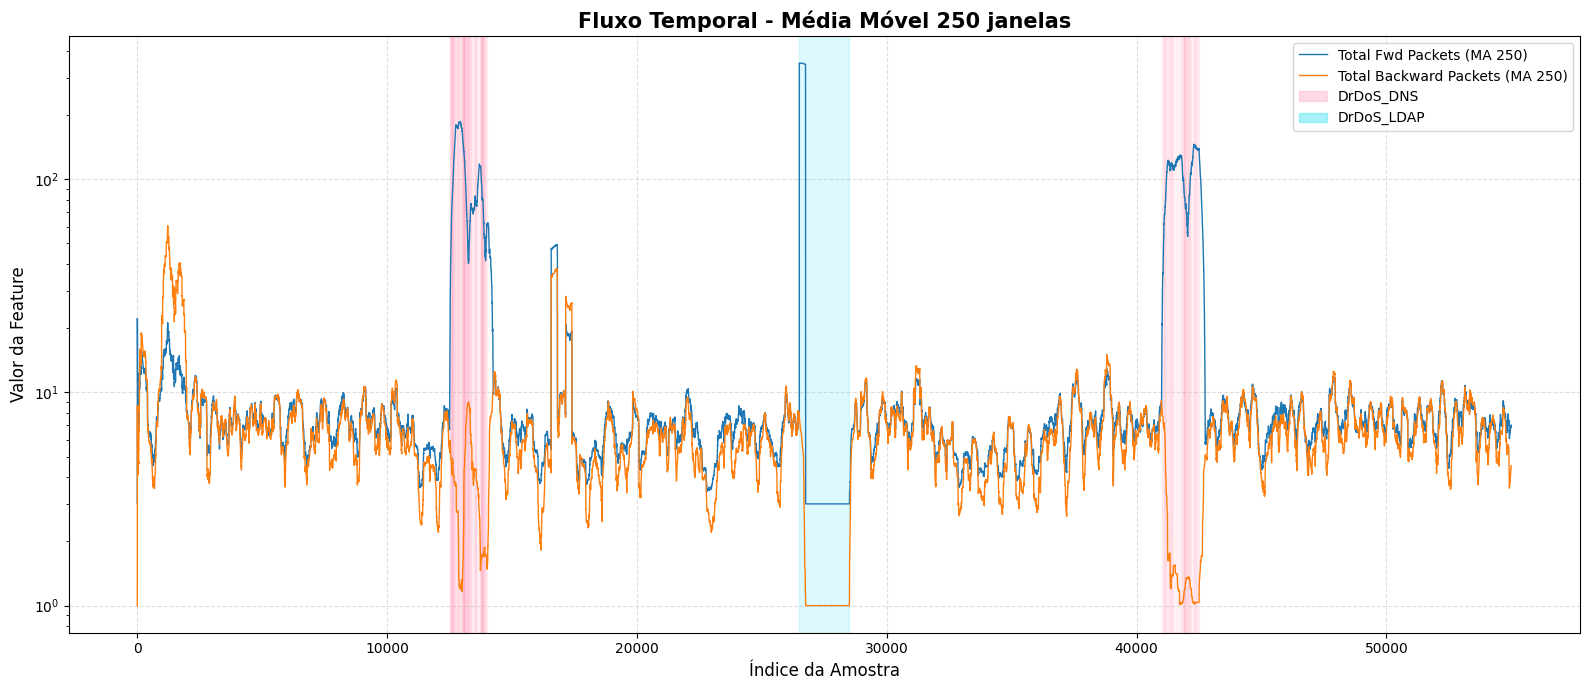

In [24]:
from py.ScenarioGenerator import ScenarioGenerator

meu_cenario = [
    ("DrDoS_DNS.csv", 1500),
    ("DrDoS_LDAP.csv", 2000),
    ("DrDoS_DNS.csv", 1500)
]

gerador = ScenarioGenerator(
    input_folder="datasets/CICDDoS2019/Origin/01-12",
    output_path="datasets/CICDDoS2019/data/01-12/Classification/DNS_LDAP_DNS.csv",
    baseline_file="datasets/CICDDoS2019/data/01-12/BENIGN.csv",
    logging=True,
    n_benign_samples=50000,
    sort_by_timestamp=False,
    remove_duplicates=False
)

gerador.generate(meu_cenario)
gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

#### Cenário Generalização 2

![Portmap_NetBIOS](datasets/CICDDoS2019/img/Portmap_NetBIOS.png)


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56965 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 50000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 50000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 2000 amostras de Portmap.csv (Filtro: Portmap).
    -> Bloco montado: 2000 amostras de NetBIOS.csv (Filtro: NetBIOS).

[*] Montando fluxo intercalado...
    Dividindo 50000 BENIGN em 3 fatias de aprox. 16666 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN     50000
Portmap     2000
NetBIOS     2000


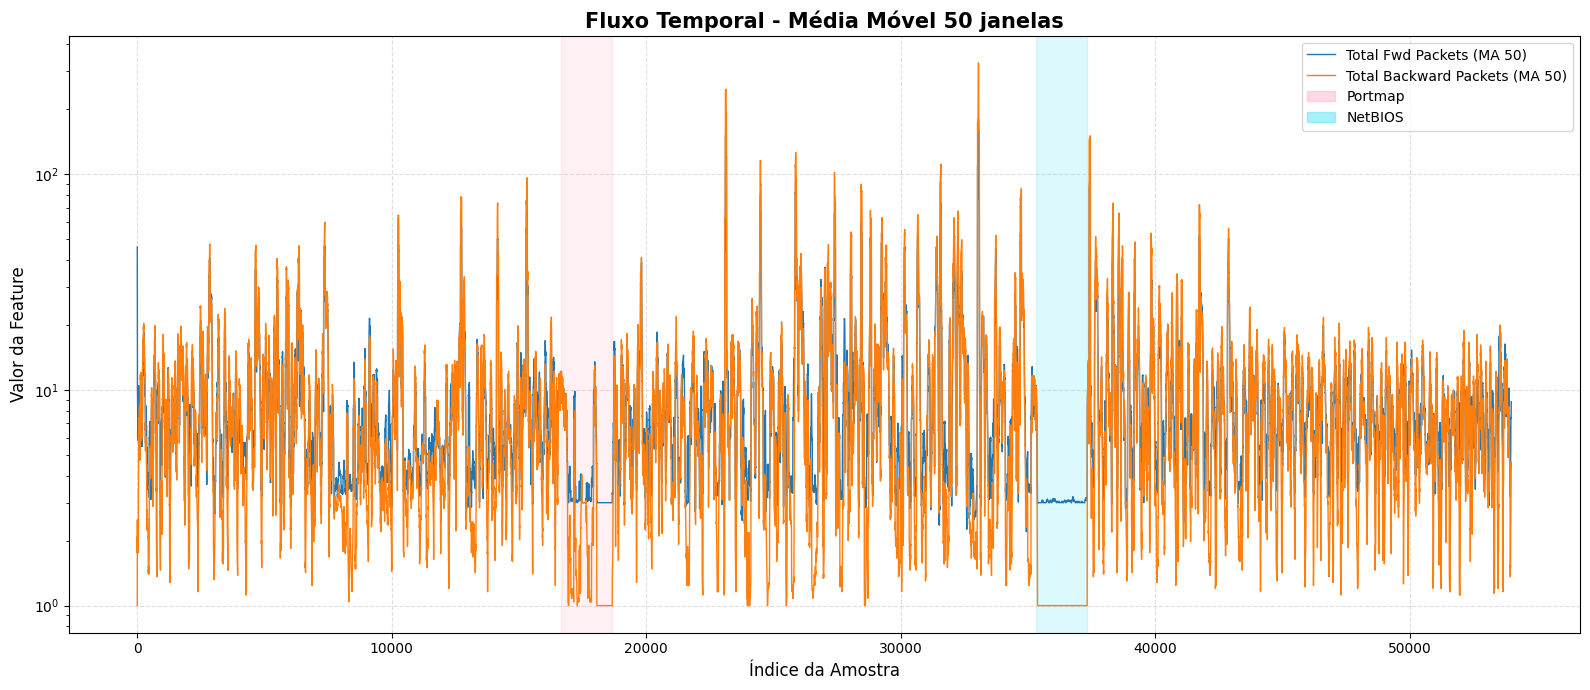

In [21]:
from py.ScenarioGenerator import ScenarioGenerator

meu_cenario = [
    ("Portmap.csv", 2000, "Portmap"),
    ("NetBIOS.csv", 2000, "NetBIOS")
]

gerador = ScenarioGenerator(
    input_folder="datasets/CICDDoS2019/Origin/03-11",
    output_path="datasets/CICDDoS2019/data/03-11/Classification/Portmap_NetBIOS.csv",
    baseline_file="datasets/CICDDoS2019/data/03-11/BENIGN.csv",
    logging=True,
    n_benign_samples=50000,
    sort_by_timestamp=False,
    remove_duplicates=False
)

gerador.generate(meu_cenario)
gerador.plot_scenario(window_size=50, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

### Detecção de Anomalias

## CIC-IDS-2017

### Classificação

#### Cenário de Consistência

![SLOW_SLOW](datasets/CIC-IDS-2017/img/SLOW_SLOW.png)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 440031 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 50000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 50000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 2000 amostras de Wednesday-workingHours.csv (Filtro: DoS Slowhttptest).
    -> Bloco montado: 2000 amostras de Wednesday-workingHours.csv (Filtro: DoS Slowhttptest).

    [AVISO] Limite do arquivo 'Wednesday-workingHours.csv' atingido!
            -> Solicitado: 2000 | Encontrado: 1499
            -> O cenário continuará utilizando as 1499 amostras obtidas.

    -> Bloco montado: 1499 amostras de Wednesday-workingHours.csv (Filtro: DoS Slowhttptest).

[*] Montando fluxo intercalado...
    Dividindo 50000 BENIGN

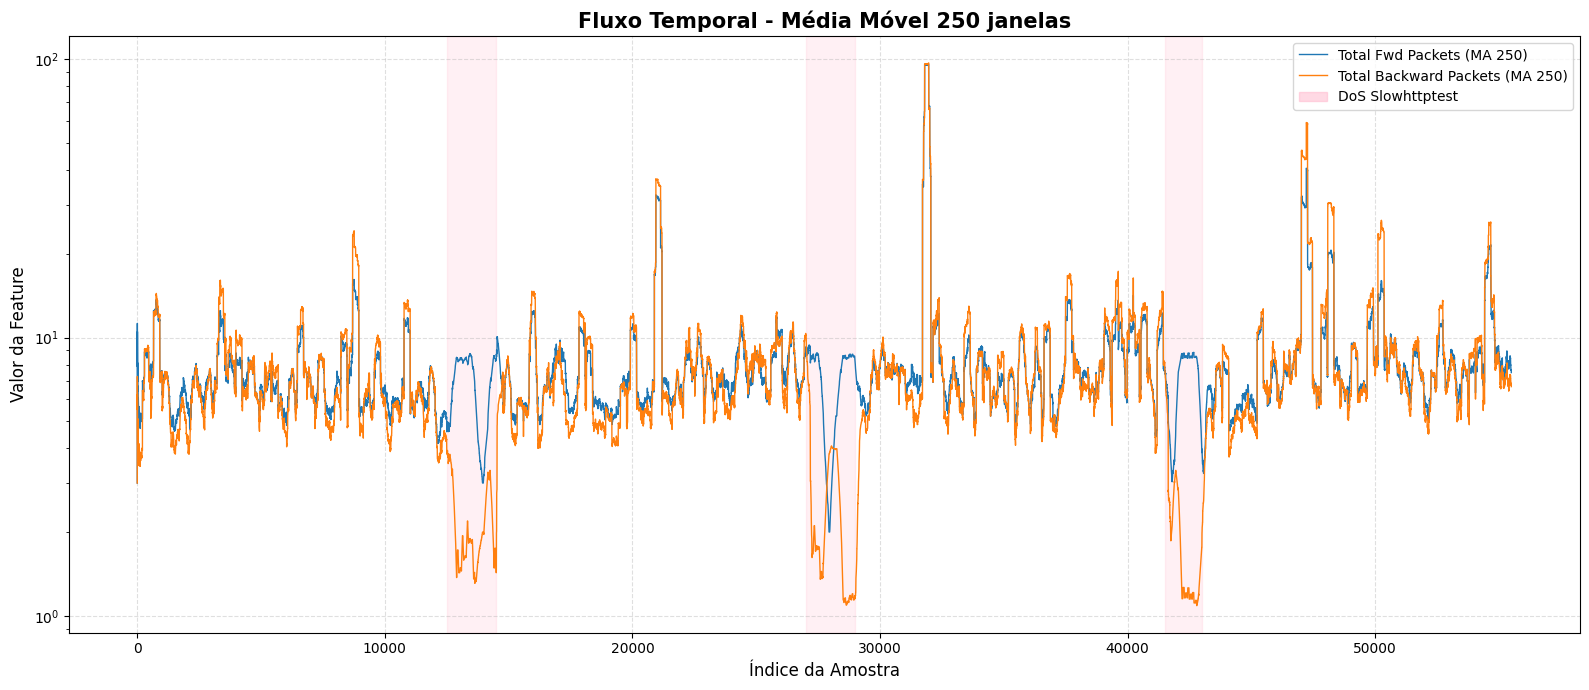

In [4]:
from py.ScenarioGenerator import ScenarioGenerator

meu_cenario = [
    ("Wednesday-workingHours.csv", 2000, "DoS Slowhttptest"),
    ("Wednesday-workingHours.csv", 2000, "DoS Slowhttptest"),
    ("Wednesday-workingHours.csv", 2000, "DoS Slowhttptest")
]

gerador = ScenarioGenerator(
    input_folder="datasets/CIC-IDS-2017/Origin",
    output_path="datasets/CIC-IDS-2017/data/Classification/Slowhttptest_x3.csv",
    baseline_file="datasets/CIC-IDS-2017/data/BENIGN_Wednesday.csv",
    target_files=["Wednesday-workingHours.csv"],
    n_benign_samples=50000,
    logging=True,
    sort_by_timestamp=False,
    remove_duplicates=False
)

gerador.generate(meu_cenario)
gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

#### Cenário Generalização

![HULK_DDoS](datasets/CIC-IDS-2017/img/HULK_DDoS.png)


[*] Baseline não encontrado. Processando arquivos da pasta datasets/CIC-IDS-2017/Origin...
    -> Filtro ativo: Lendo apenas os 2 arquivos especificados.
    Lendo: Wednesday-workingHours.csv...
    Lendo: Friday-WorkingHours-Afternoon-DDos.csv...
    Concatenando DataFrame e ordenando por Timestamp...
    Salvando 537749 amostras no arquivo base...

[*] Reduzindo amostras benignas para 50000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 50000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 5000 amostras de Wednesday-workingHours.csv (Filtro: DoS Hulk).
    -> Bloco montado: 5000 amostras de Friday-WorkingHours-Afternoon-DDos.csv (Filtro: DDoS).

[*] Montando fluxo intercalado...
    Dividindo 50000 BENIGN em 3 fatias de aprox. 16666 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
--------------------------------

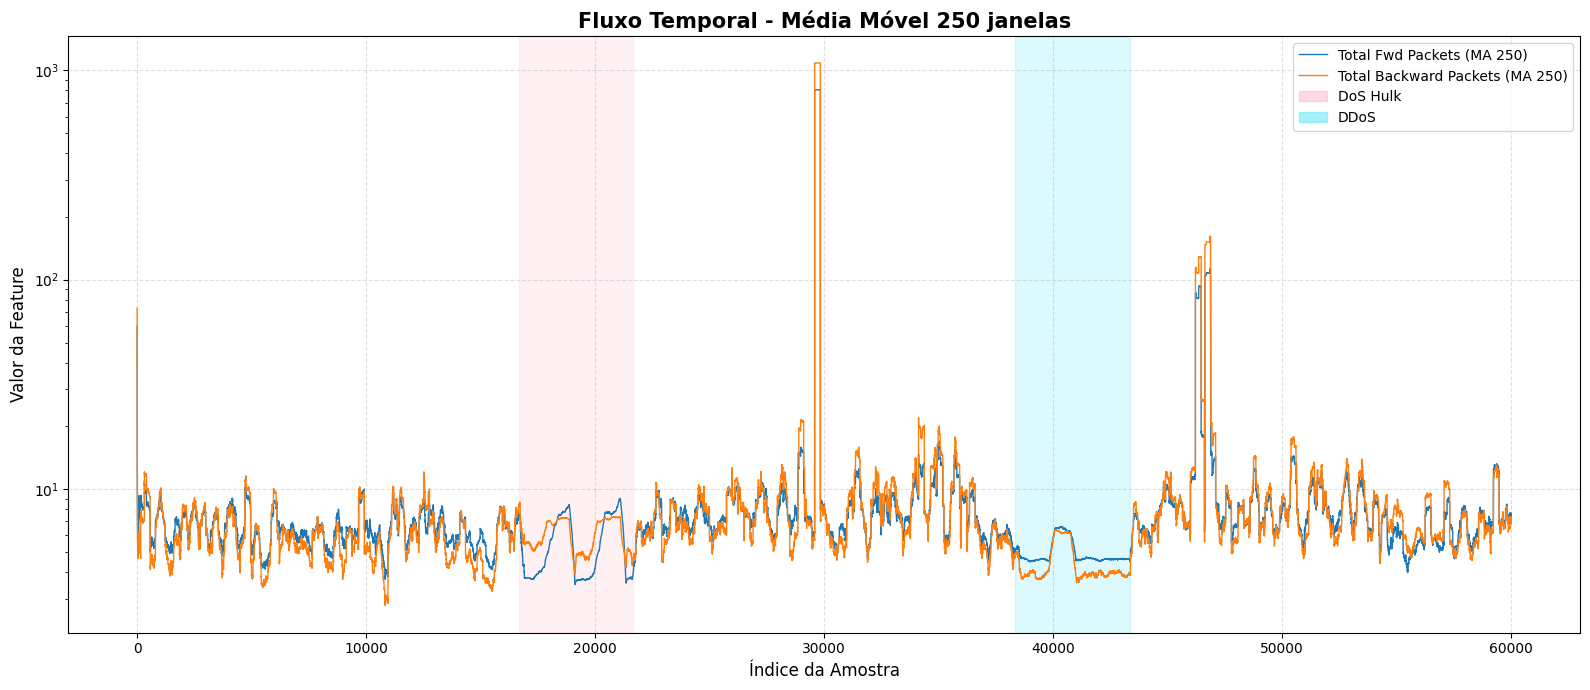

In [5]:
from py.ScenarioGenerator import ScenarioGenerator

meu_cenario = [
    ("Wednesday-workingHours.csv", 5000, "DoS Hulk"),
    ("Friday-WorkingHours-Afternoon-DDos.csv", 5000, "DDoS")
]

gerador = ScenarioGenerator(
    input_folder="datasets/CIC-IDS-2017/Origin",
    output_path="datasets/CIC-IDS-2017/data/Classification/DoSHulk_DDoS.csv",
    baseline_file="datasets/CIC-IDS-2017/data/BENIGN_Wednesday_Friday.csv",
    target_files=["Wednesday-workingHours.csv", "Friday-WorkingHours-Afternoon-DDos.csv"],
    n_benign_samples=50000,
    logging=True,
    sort_by_timestamp=False,
    remove_duplicates=False
)

gerador.generate(meu_cenario)
gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

### Detecção de Anomalias